# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.


In [35]:
import pandas as pd

file_path = './cars_hw.csv'
data = pd.read_csv(file_path)
data_head = data.head()
data_info = data.info()
data_summary = data.describe(include='all')

data_head, data_info, data_summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         976 non-null    int64 
 1   Make               976 non-null    object
 2   Make_Year          976 non-null    int64 
 3   Color              976 non-null    object
 4   Body_Type          976 non-null    object
 5   Mileage_Run        976 non-null    int64 
 6   No_of_Owners       976 non-null    object
 7   Seating_Capacity   976 non-null    int64 
 8   Fuel_Type          976 non-null    object
 9   Transmission       976 non-null    object
 10  Transmission_Type  976 non-null    object
 11  Price              976 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 91.6+ KB


(   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
 0           1  Volkswagen       2017  silver      sedan        44611   
 1           2     Hyundai       2016     red  crossover        20305   
 2           3       Honda       2019   white        suv        29540   
 3           4     Renault       2017  bronze  hatchback        35680   
 4           5     Hyundai       2017  orange  hatchback        25126   
 
   No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
 0          1st                 5    diesel      7-Speed         Automatic   
 1          1st                 5    petrol      5-Speed            Manual   
 2          2nd                 5    petrol      5-Speed            Manual   
 3          1st                 5    petrol      5-Speed            Manual   
 4          1st                 5    petrol      5-Speed            Manual   
 
     Price  
 0  657000  
 1  682000  
 2  793000  
 3  414000  
 4  515000  ,
 None,
    

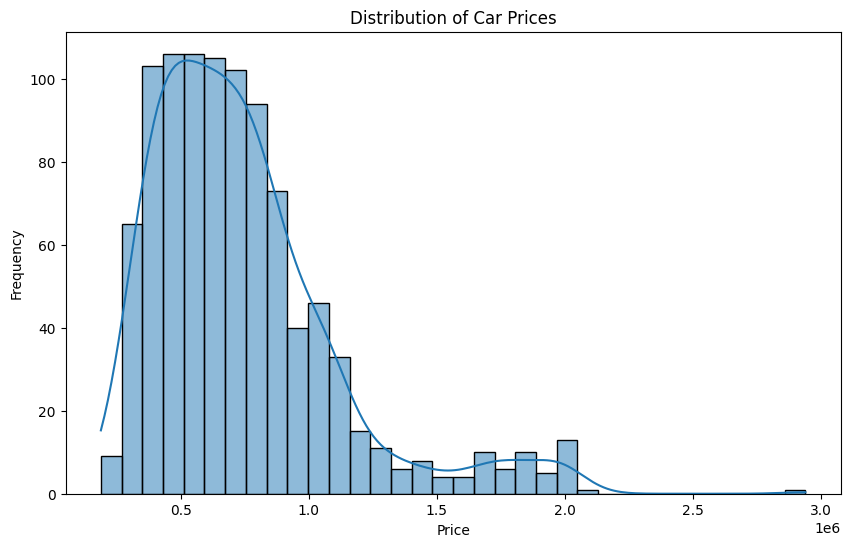

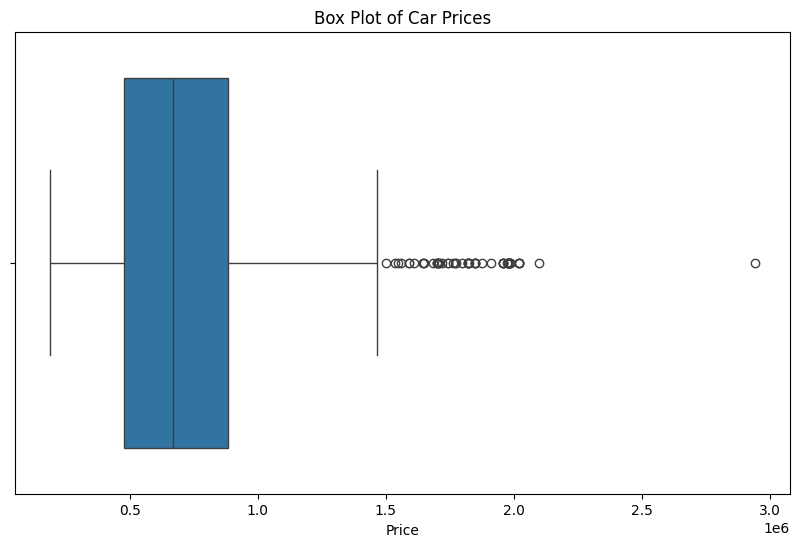

In [36]:
data = data.drop(columns=['Unnamed: 0'])

import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Price', kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Box plot for Price to identify outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Price')
plt.title('Box Plot of Car Prices')
plt.xlabel('Price')
plt.show()


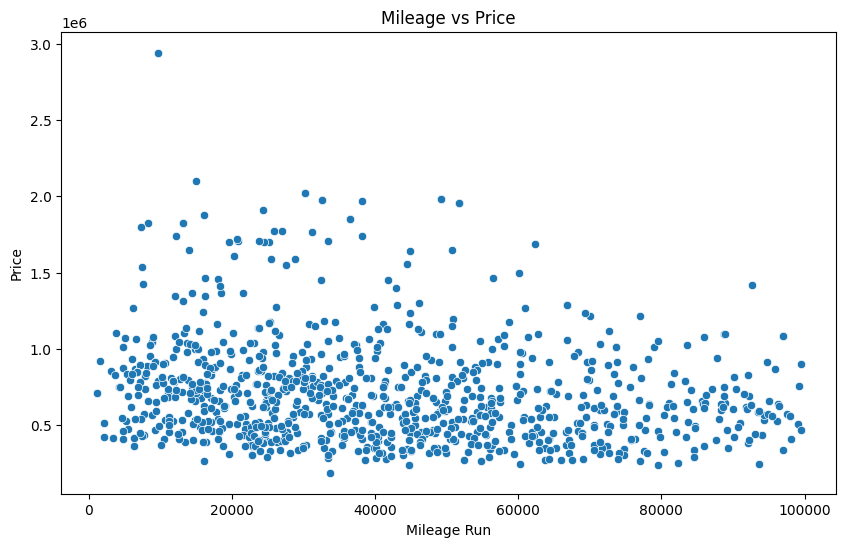

In [37]:
# Scatter plot of Mileage vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Mileage_Run', y='Price')
plt.title('Mileage vs Price')
plt.xlabel('Mileage Run')
plt.ylabel('Price')
plt.show()


2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.

In [38]:
data_encoded = pd.get_dummies(data, drop_first=True)

3. Implement an ~80/~20 train-test split. Put the test data aside.

In [39]:
from sklearn.model_selection import train_test_split

X = data_encoded.drop(columns=['Price'])
y = data_encoded['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((780, 45), (196, 45), (780,), (196,))

4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_train_pred = linear_model.predict(X_train)
y_test_pred = linear_model.predict(X_test)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Simple Linear Model Results:")
print(f"Training RMSE: {rmse_train}")
print(f"Training R^2: {r2_train}")
print(f"Testing RMSE: {rmse_test}")
print(f"Testing R^2: {r2_test}")

Simple Linear Model Results:
Training RMSE: 142114.260569685
Training R^2: 0.8553060847751645
Testing RMSE: 143575.19660589748
Testing R^2: 0.8202733305989026


5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?

In [41]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())

poly_model.fit(X_train, y_train)

y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

rmse_train_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
r2_train_poly = r2_score(y_train, y_train_pred_poly)
rmse_test_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
r2_test_poly = r2_score(y_test, y_test_pred_poly)

print("\nComplex Model with Interactions Results:")
print(f"Training RMSE: {rmse_train_poly}")
print(f"Training R^2: {r2_train_poly}")
print(f"Testing RMSE: {rmse_test_poly}")
print(f"Testing R^2: {r2_test_poly}")


Complex Model with Interactions Results:
Training RMSE: 74398.79606674802
Training R^2: 0.9603441955511
Testing RMSE: 2726059.120713027
Testing R^2: -63.79242392210726


6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
> The simple model provides a good baseline with relatively high $R^2$ values, explaining variance in car prices. Between the two models, the complex model fit the training data significantly better but performed poorly on the testing data, indicating overfitting. Simple models with fewer features tend to generalize better, evident with the simpler model, which has relatively better performance between training and test data. 
